# Characterizing the Burrard Inlet Rivers

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from salishsea_tools import viz_tools, geo_tools

import yaml

In [21]:
bathyfile = '../../../grid/sss150/bathymetry_sss150_update202108210102AUM1.nc'
coords = '../../../grid/sss150/coordinates_sss150_20210709.nc'

In [22]:
bathy = xr.open_dataset(bathyfile)
coord = xr.open_dataset(coords)
bmask = bathy.Bathymetry == 0  # new tmask
nnav_lon = coord.nav_lon[:]
nnav_lat = coord.nav_lat[:]

Seymour River watershed area = 176 km2 https://www.pskf.ca/ecology/watershed/northvan/seymour.htm  
Indian River approx 218 square kilometres in area Tseil-waututh integrated stewardship plan + 4.38 km2 nearby = 222 km2

Major Watersheds: 
Capilano 
Indian

UsingiMapBC at 1km resolution (aka top number on the scale is 1km)

Medium Rivers
Mackay Crk  10.11 km2
Mosquito Creek 16.85 km2
Lynn Creek 62.06 km2
McCartney Creek   11.22 km2
Francis Creek 8.75 km2
Allan Creek 4.16 km2
Percy Creek 6.34 km2
Shone Creek 7.42 km2
Elsay Creek 32.57 km2
Grand Creek 8.72 + 15.81 km2 = 24.53 km2
Lighthall Creek 7.87 km2
Bunsen Lake : includes pretty much all the water from Coquitlam Lake and its watershed = 159.14+35.99+4.04 = 199.53 km2
Sasamat Lake 6.60 + 0.87 km2 = 7.47 km2
Mossum Creek 14.06 km2
Noons Creek 6.25 km2

Along the Coast
A Port Moody 9.55 km2 + 3.59 km2 = 13.14 km2
East of Burnaby Mountain 6.99 km2
East of McGill point 10.83 km2
Downtown 3.38 km2
Lost Lagoon 2.57 km2


In [4]:
Total_Area = (176 + 222 + 10.11 + 16.85 + 62.06 + 11.22 + 8.75 + 4.16 + 6.34 + 7.42 + 32.57 + 24.53 + 7.87 + 
              199.53 + 7.47 + 14.06 + 6.25 + 13.14 + 6.99 + 1.83 + 3.38 + 2.57)
Total_Area

845.1000000000001

In [5]:
#Previous, first narrows area was
prev_area = (23.16 + 20.66 + 10.38 + 10.24 +
                           93.71 + 195.12 + 342.65)
prev_area

695.92

In [6]:
print (Total_Area - prev_area, 199.53)

149.18000000000018 199.53


In [ ]:
So was missing Coquitlam.


In [10]:
# from LocateRivers.ipynb
TotalHoweNotSquamish = 736.39+357.87+398.38+82.58
# Use 3600 km2 from Clague but that misses some. 
# Add 200 km2 to give 3800
Squamish = 3800
# and a total land part of watershed of 5375.22.** need to add 149 km2
TotalHoweNotSquamish = 736.39+357.87+398.38+82.58 + 149.18
# Note that Morrison Area is 6234 km2 including water
Howe = TotalHoweNotSquamish + 3800
# I'm going to assume Morrison treated Coquitlam as part of the Howe watershed, aka did it correct

In [11]:
Squamish/Howe

0.6878575048874086

In [ ]:
def make_prop_dict(wc, rivers):
    prop_dict = {}
    ws = 'fraser'
    prop_dict[ws] = {}
    rivers = myrivers1a
    for river in rivers:
        prop_dict[ws][river] = {}
        prop_dict[ws][river]['prop'] = 'entry'
        prop_dict[ws][river]['i'] = rivers[river][2]
        prop_dict[ws][river]['j'] = rivers[river][3]
        prop_dict[ws][river]['di'] = 1
        prop_dict[ws][river]['dj'] = 1
        prop_dict[ws][river]['depth'] = 1
    print (prop_dict)

### Areas

In [151]:
areas = {'Mackay Creek':  10.11 ,# km2
'Mosquito Creek': 16.85 ,#km2
'Lynn Creek': 62.06 ,#km2
'McCartney Creek':   11.22 ,#km2
'Francis Creek': 8.75,# km2
'Allan Creek': 4.16,# km2
'Percy Creek': 6.34,# km2
'Shone Creek': 7.42,# km2
'Elsay Creek': 32.57,# km2
'Grand Creek': 8.72 + 15.81,# km2 = 24.53 km2
'Lighthall Creek': 7.87,# km2
'Bunsen Lake':  #includes pretty much all the water from Coquitlam Lake and its watershed = 
         159.14+35.99+4.04,# = 199.53 km2
'Sasamat Lake': 6.60 + 0.87,# km2 = 7.47 km2
'Mossum Creek': 14.06,# km2
'Noons Creek': 6.25,# km2

'Seymour': 176, #km2
'Indian': 222, #km2

#Along the Coast
'Port Moody': 9.55 + 3.59,#= 13.14 km2
'Burnaby Mountain': 6.99,# km2
'McGill Point': 10.83,# km2
'Downtown': 3.38,# km2
'Lost Lagoon': 2.57,# km2
        }

### Locations

In [140]:
# Major Watersheds: 
locations = {'Seymour': [49.29664, -123.02245],

'Indian': #multiple mouths: put it all across the top
[49.46687791868848, -122.88436465257121],

#Medium Rivers
'Mackay Creek': [49.31418, -123.10268],
             
'Mosquito Creek': [49.31343, -123.09154],

'Lynn Creek': [49.29893, -123.03936],

'McCartney Creek': [49.30766, -122.99867],

'Francis Creek': [49.33194, -122.93842],

'Allan Creek': [49.34179, -122.91988],

'Percy Creek': [49.35375, -122.90666],

'Shone Creek': [49.37254, -122.89070],

'Elsay Creek': [49.40751, -122.88486],

'Grand Creek': [49.44960, -122.86186],

'Lighthall Creek': [49.40829, -122.85963],

'Bunsen Lake': [49.370406668339534, -122.87365984977869],
                    
'Sasamat Lake': [49.32255, -122.90495],

'Mossum Creek': [49.29736, -122.86770],

'Noons Creek': [49.28371, -122.83474],


#Along the Coast
'Port Moody': [49.28158, -122.85911],

'Burnaby Mountain': [49.28807, -122.96125],

'McGill Point': [49.29065, -123.03610],

'Downtown': [49.28684, -123.11042],

'Lost Lagoon': [49.29546, -123.13532],
}

In [141]:
locations

{'Seymour': [49.29664, -123.02245],
 'Indian': [49.46687791868848, -122.88436465257121],
 'Mackay Creek': [49.31418, -123.10268],
 'Mosquito Creek': [49.31343, -123.09154],
 'Lynn Creek': [49.29893, -123.03936],
 'McCartney Creek': [49.30766, -122.99867],
 'Francis Creek': [49.33194, -122.93842],
 'Allan Creek': [49.34179, -122.91988],
 'Percy Creek': [49.35375, -122.90666],
 'Shone Creek': [49.37254, -122.8907],
 'Elsay Creek': [49.40751, -122.88486],
 'Grand Creek': [49.4496, -122.86186],
 'Lighthall Creek': [49.40829, -122.85963],
 'Bunsen Lake': [49.370406668339534, -122.87365984977869],
 'Sasamat Lake': [49.32255, -122.90495],
 'Mossum Creek': [49.29736, -122.8677],
 'Noons Creek': [49.28371, -122.83474],
 'Port Moody': [49.28158, -122.85911],
 'Burnaby Mountain': [49.28807, -122.96125],
 'McGill Point': [49.29065, -123.0361],
 'Downtown': [49.28684, -123.11042],
 'Lost Lagoon': [49.29546, -123.13532]}

In [25]:
def plot_newrivers(ax, nav_lon, nav_lat, fixed_rivers, bynumber=False):
    if bynumber:
        for river in fixed_rivers:
            xx = 0.5 * (nav_lon[fixed_rivers[river][2], fixed_rivers[river][3]] +
                            nav_lon[fixed_rivers[river][2]+1, fixed_rivers[river][3]+1])
            yy = 0.5 * (nav_lat[fixed_rivers[river][2], fixed_rivers[river][3]] +
                            nav_lat[fixed_rivers[river][2]+1, fixed_rivers[river][3]+1])            
            ax.plot(xx, yy, 'c+')
    else:
        for river in fixed_rivers:
            xx = 0.5 * (nav_lon[fixed_rivers[river]['i'], fixed_rivers[river]['j']] +
                            nav_lon[fixed_rivers[river]['i']+1, fixed_rivers[river]['j']+1])
            yy = 0.5 * (nav_lat[fixed_rivers[river]['i'], fixed_rivers[river]['j']] +
                            nav_lat[fixed_rivers[river]['i']+1, fixed_rivers[river]['j']+1])            
            ax.plot(xx, yy, 'c+')
        

In [26]:
def plot_newrivers_index(ax, fixed_rivers, bynumber=False):
    if bynumber:
        for river in fixed_rivers:
            xx = fixed_rivers[river][3] + 0.5
            yy = fixed_rivers[river][2] + 0.5            
            ax.plot(xx, yy, 'c*')
    else:
        for river in fixed_rivers:
            xx = fixed_rivers[river]['j'] + 0.5
            yy = fixed_rivers[river]['i'] + 0.5            
            ax.plot(xx, yy, 'c*')

In [142]:
with_coords = locations
for river in locations:
    yy, xx = geo_tools.find_closest_model_point(locations[river][1], locations[river][0], 
                                              bathy.nav_lon[:], bathy.nav_lat[:], land_mask=bmask)
    print (river, yy, xx)
    with_coords[river] = [locations[river][0], locations[river][1], yy, xx]
# Hand corrections
with_coords['Mackay Creek'][2] = with_coords['Mackay Creek'][2] - 1
with_coords['Mosquito Creek'][2] = with_coords['Mosquito Creek'][2] + 1
with_coords['Mosquito Creek'][3] = with_coords['Mosquito Creek'][3] + 1
with_coords['Lynn Creek'][3] = with_coords['Lynn Creek'][3] + 1
with_coords['Seymour'][2] = 367
with_coords['Seymour'][3] = 290
with_coords['McGill Point'][2] = with_coords['McGill Point'][2] - 1
with_coords['Mossum Creek'][2] = with_coords['Mossum Creek'][2] + 1
with_coords['Port Moody'][2] = 352
with_coords['Port Moody'][3] = 382
with_coords['Allan Creek'][2] = with_coords['Allan Creek'][2] + 1
with_coords['Percy Creek'][3] = with_coords['Percy Creek'][3] - 1
with_coords['Elsay Creek'][2] = with_coords['Elsay Creek'][2] + 1
with_coords['Elsay Creek'][3] = with_coords['Elsay Creek'][3] - 1
with_coords['Indian'][2] = 559
with_coords['Indian'][3] = 355
with_coords['Indian 2'] = [np.nan, np.nan, 560, 356]
with_coords['Indian 3'] = [np.nan, np.nan, 561, 356] # dj = 2
with_coords['Indian 4'] = [np.nan, np.nan, 563, 357]
with_coords['Indian 5'] = [np.nan, np.nan, 564, 357] # dj = 2
print (with_coords)

Seymour 359 292
Indian 557 357
Mackay Creek 374 247
Mosquito Creek 373 252
Lynn Creek 361 282
McCartney Creek 373 304
Francis Creek 403 336
Allan Creek 415 346
Percy Creek 429 353
Shone Creek 451 361
Elsay Creek 491 362
Grand Creek 540 371
Lighthall Creek 493 375
Bunsen Lake 449 370
Sasamat Lake 396 355
Mossum Creek 369 378
Noons Creek 356 397
Port Moody 352 384
Burnaby Mountain 353 327
McGill Point 352 285
Downtown 343 243
Lost Lagoon 352 229
{'Seymour': [49.29664, -123.02245, 367, 290], 'Indian': [49.46687791868848, -122.88436465257121, 559, 355], 'Mackay Creek': [49.31418, -123.10268, 373, 247], 'Mosquito Creek': [49.31343, -123.09154, 374, 253], 'Lynn Creek': [49.29893, -123.03936, 361, 283], 'McCartney Creek': [49.30766, -122.99867, 373, 304], 'Francis Creek': [49.33194, -122.93842, 403, 336], 'Allan Creek': [49.34179, -122.91988, 416, 346], 'Percy Creek': [49.35375, -122.90666, 429, 352], 'Shone Creek': [49.37254, -122.8907, 451, 361], 'Elsay Creek': [49.40751, -122.88486, 492, 3

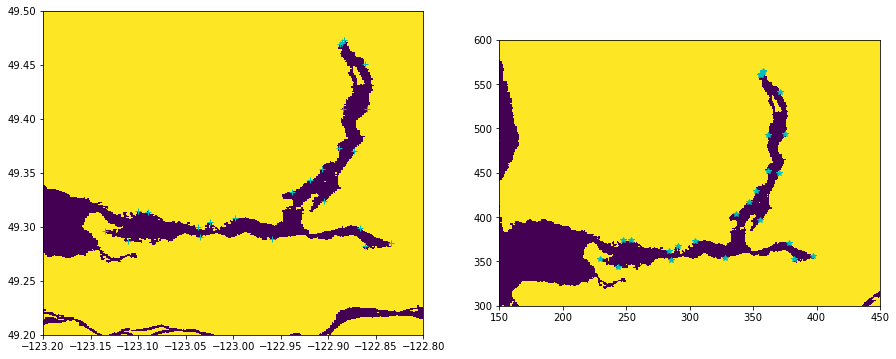

In [133]:
fig, axs = plt.subplots(1, 2, figsize=(15, 9))

axs[0].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[1].pcolormesh(bmask)

plot_newrivers(axs[0], nnav_lon, nnav_lat, with_coords, bynumber=True)

axs[0].set_xlim(-123.2, -122.8)
axs[0].set_ylim(49.2, 49.5)
viz_tools.set_aspect(axs[0], coords='map')

plot_newrivers_index(axs[1], with_coords, bynumber=True)

axs[1].set_xlim(150, 450)
axs[1].set_ylim(300, 600)
axs[1].set_aspect(0.7);

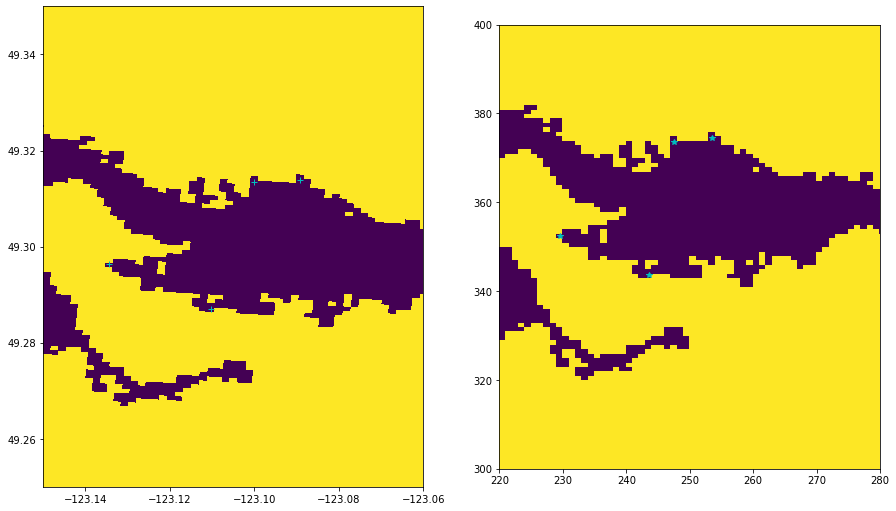

In [138]:
fig, axs = plt.subplots(1, 2, figsize=(15, 9))

axs[0].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[1].pcolormesh(bmask)

plot_newrivers(axs[0], nnav_lon, nnav_lat, with_coords, bynumber=True)

axs[0].set_xlim(-123.15, -123.06)
axs[0].set_ylim(49.25, 49.35)
viz_tools.set_aspect(axs[0], coords='map')

plot_newrivers_index(axs[1], with_coords, bynumber=True)

axs[1].set_xlim(220, 280)
axs[1].set_ylim(300, 400)
axs[1].set_aspect(0.7);

Like: Lost Lagoon, downtown  
Move Mosquito Creek +1, +1 Done
Move MacKay -1 in y

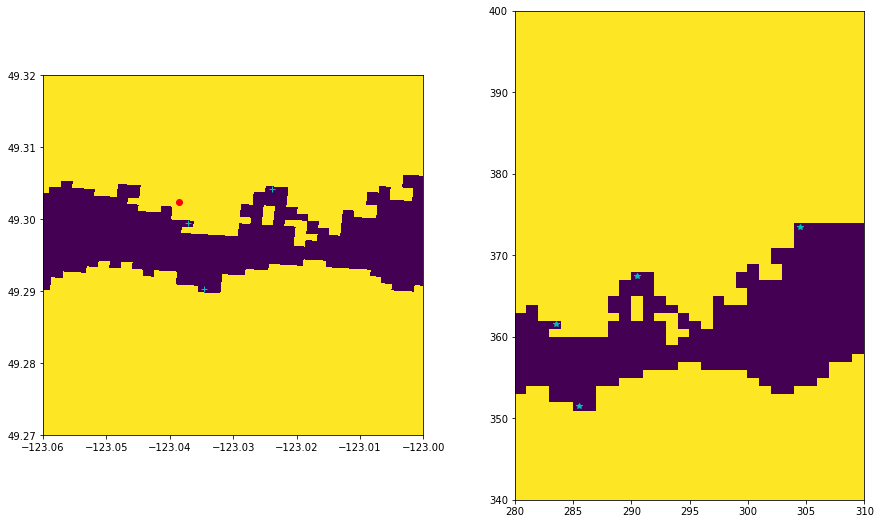

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(15, 9))

axs[0].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[1].pcolormesh(bmask)

plot_newrivers(axs[0], nnav_lon, nnav_lat, with_coords, bynumber=True)

axs[0].set_xlim(-123.06, -123.0)
axs[0].set_ylim(49.27, 49.32)
viz_tools.set_aspect(axs[0], coords='map')

plot_newrivers_index(axs[1], with_coords, bynumber=True)

axs[0].plot(-123.03848, 49.30240, 'ro')
#axs[1].plot(290+0.5, 367+0.5, 'ro')


axs[1].set_xlim(280, 310)
axs[1].set_ylim(340, 400)
axs[1].set_aspect(0.7);

Lynn Creek: in one: 0, +1 weird shape but okay  
Seymour River: 367, 290  
McGill Point, into coast: -1, 0  
done


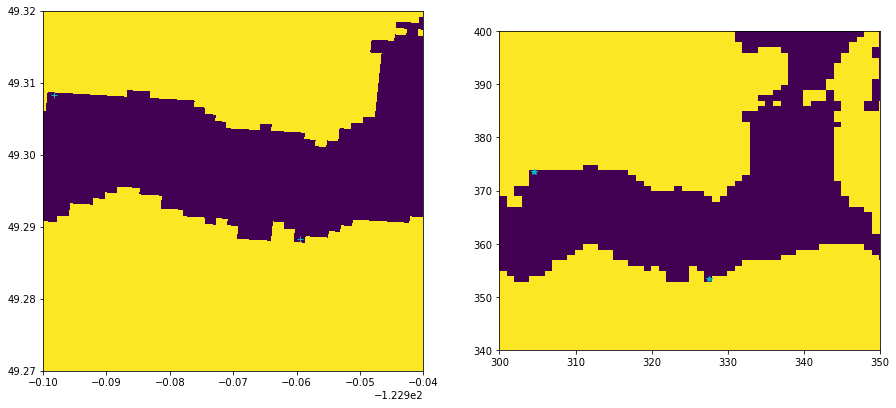

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(15, 9))

axs[0].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[1].pcolormesh(bmask)

plot_newrivers(axs[0], nnav_lon, nnav_lat, with_coords, bynumber=True)

axs[0].set_xlim(-123.0, -122.94)
axs[0].set_ylim(49.27, 49.32)
viz_tools.set_aspect(axs[0], coords='map')

plot_newrivers_index(axs[1], with_coords, bynumber=True)

axs[0].plot(-123.03848, 49.30240, 'ro')
#axs[1].plot(290+0.5, 367+0.5, 'ro')


axs[1].set_xlim(300, 350)
axs[1].set_ylim(340, 400)
axs[1].set_aspect(0.7);

McCartney Creek  looks good  
Burnaby Mountain looks good

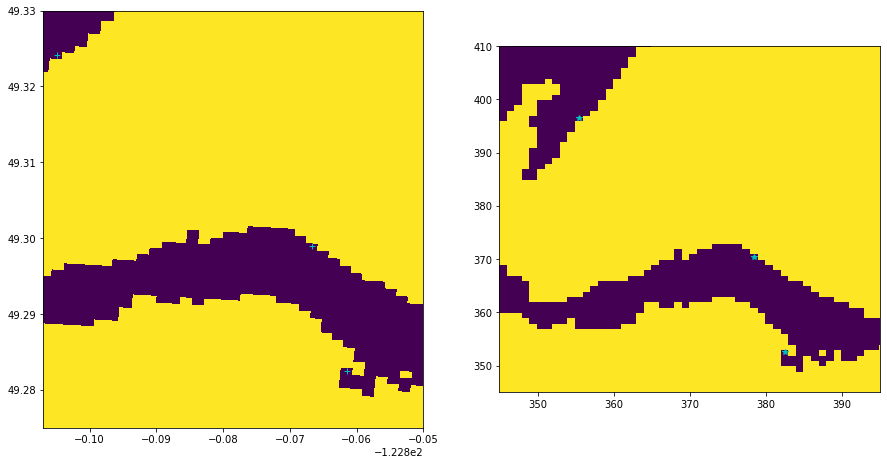

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(15, 9))

axs[0].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[1].pcolormesh(bmask)

plot_newrivers(axs[0], nnav_lon, nnav_lat, with_coords, bynumber=True)

axs[0].set_xlim(-122.907, -122.85)
axs[0].set_ylim(49.275, 49.33)
viz_tools.set_aspect(axs[0], coords='map')

plot_newrivers_index(axs[1], with_coords, bynumber=True)

axs[0].plot(-123.03848, 49.30240, 'ro')
#axs[1].plot(382+0.5, 352+0.5, 'ro')


axs[1].set_xlim(345, 395)
axs[1].set_ylim(345, 410)
axs[1].set_aspect(0.7);

Sasamat looks good  
Mossum Creek needs to tuck in: +1, 0  
Port Moody 382 352  

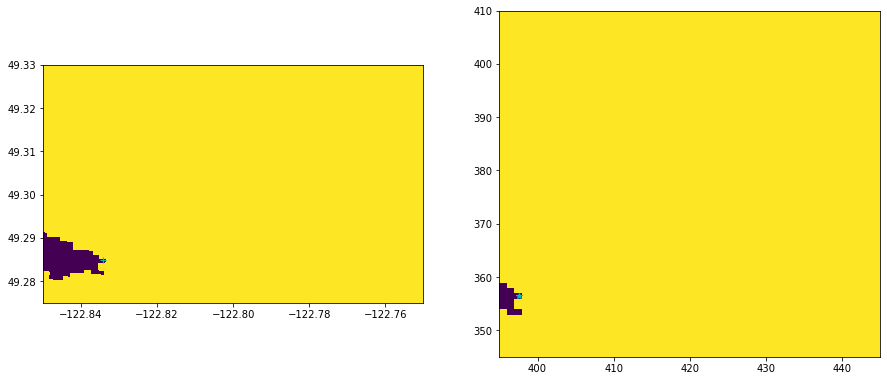

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(15, 9))

axs[0].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[1].pcolormesh(bmask)

plot_newrivers(axs[0], nnav_lon, nnav_lat, with_coords, bynumber=True)

axs[0].set_xlim(-122.85, -122.75)
axs[0].set_ylim(49.275, 49.33)
viz_tools.set_aspect(axs[0], coords='map')

plot_newrivers_index(axs[1], with_coords, bynumber=True)

axs[0].plot(-123.03848, 49.30240, 'ro')
#axs[1].plot(382+0.5, 352+0.5, 'ro')


axs[1].set_xlim(395, 445)
axs[1].set_ylim(345, 410)
axs[1].set_aspect(0.7);

Noon's Creek looks fine.

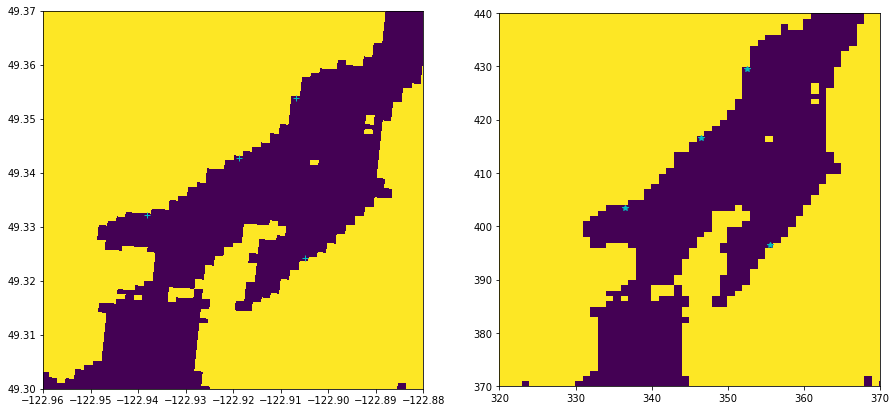

In [89]:
fig, axs = plt.subplots(1, 2, figsize=(15, 9))

axs[0].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[1].pcolormesh(bmask)

plot_newrivers(axs[0], nnav_lon, nnav_lat, with_coords, bynumber=True)

axs[0].set_xlim(-122.96, -122.88)
axs[0].set_ylim(49.3, 49.37)
viz_tools.set_aspect(axs[0], coords='map')

plot_newrivers_index(axs[1], with_coords, bynumber=True)

axs[0].plot(-123.03848, 49.30240, 'ro')
#axs[1].plot(382+0.5, 352+0.5, 'ro')


axs[1].set_xlim(320, 370)
axs[1].set_ylim(370, 440)
axs[1].set_aspect(0.7);

Francis Creek  looks good  
Allan Creek  +1, 0 to tuck it in  
Percy Creek  0, -1 to tuck it in    done  

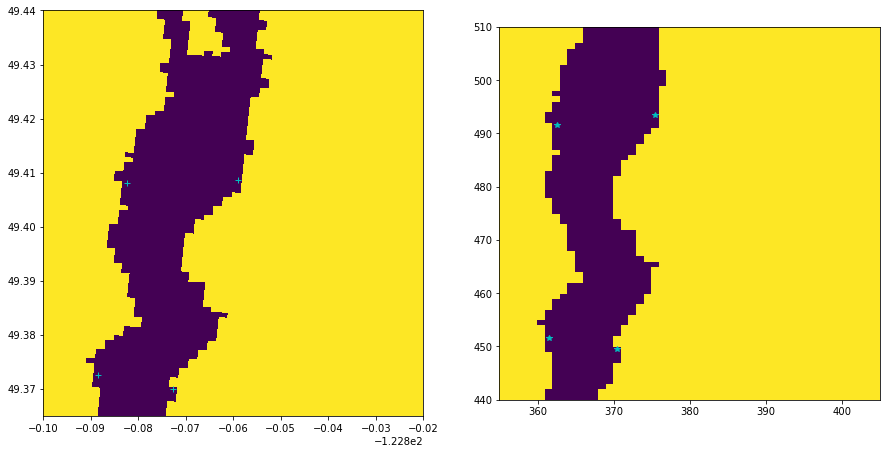

In [96]:
fig, axs = plt.subplots(1, 2, figsize=(15, 9))

axs[0].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[1].pcolormesh(bmask)

plot_newrivers(axs[0], nnav_lon, nnav_lat, with_coords, bynumber=True)

axs[0].set_xlim(-122.9, -122.82)
axs[0].set_ylim(49.365, 49.44)
viz_tools.set_aspect(axs[0], coords='map')

plot_newrivers_index(axs[1], with_coords, bynumber=True)

axs[0].plot(-123.03848, 49.30240, 'ro')
#axs[1].plot(382+0.5, 352+0.5, 'ro')


axs[1].set_xlim(355, 405)
axs[1].set_ylim(440, 510)
axs[1].set_aspect(0.7);

Shone Creek 451 361  looks good   
Elsay Creek 491 362  tuck it in +1, -1  
Lighthall Creek 493 375  looks good  
Bunsen Lake 449 370   looks good   done  

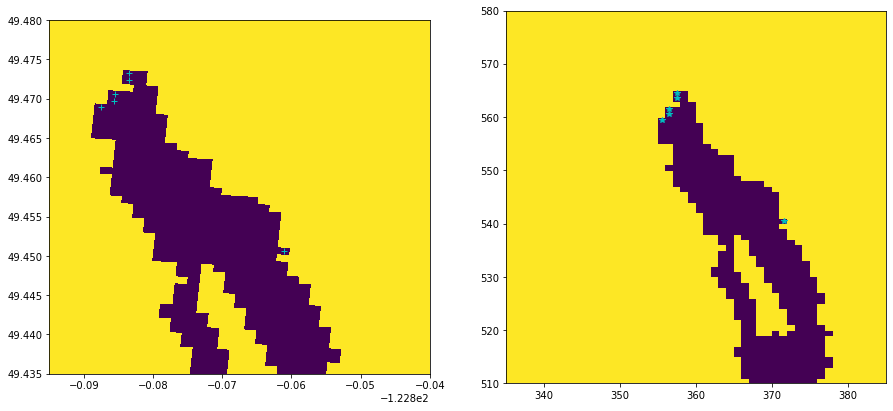

In [119]:
fig, axs = plt.subplots(1, 2, figsize=(15, 9))

axs[0].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[1].pcolormesh(bmask)

plot_newrivers(axs[0], nnav_lon, nnav_lat, with_coords, bynumber=True)

axs[0].set_xlim(-122.895, -122.84)
axs[0].set_ylim(49.435, 49.48)
viz_tools.set_aspect(axs[0], coords='map')

plot_newrivers_index(axs[1], with_coords, bynumber=True)

axs[0].plot(-123.03848, 49.30240, 'ro')
#axs[1].plot(355+0.5, 559+0.5, 'ro')
#axs[1].plot(356+0.5, 560+0.5, 'ro')
#axs[1].plot(356+0.5, 561+0.5, 'ro')
#axs[1].plot(357+0.5, 561+0.5, 'ro')
#axs[1].plot(357+0.5, 563+0.5, 'ro')
#axs[1].plot(357+0.5, 564+0.5, 'ro')
#axs[1].plot(358+0.5, 564+0.5, 'ro')


axs[1].set_xlim(335, 385)
axs[1].set_ylim(510, 580)
axs[1].set_aspect(0.7);

Grand Creek  very nice  
Indian Arm 7 parts: 355, 559  
356, 560  
356, 561 and 357, 561  
357, 563  
357, 564 and 358, 564  done: note the double values are not showing here. 

In [154]:
with open('Inside_First_Narrows_Locations.yaml', 'w') as file:
        yaml.dump(with_coords, file)

In [155]:
with open('Inside_First_Narrows_Areas.yaml', 'w') as file:
        yaml.dump(areas, file)

In [156]:
proportion = {}
for river in areas:
    proportion[river] = areas[river]/(5372.22 + 149.18)
with open('Inside_First_Narrows_Proportions.yaml', 'w') as file:
        yaml.dump(proportion, file)

In [152]:
for river in areas:
    print (river)
    if river not in with_coords:
        print ('missing in coords')

Mackay Creek
Mosquito Creek
Lynn Creek
McCartney Creek
Francis Creek
Allan Creek
Percy Creek
Shone Creek
Elsay Creek
Grand Creek
Lighthall Creek
Bunsen Lake
Sasamat Lake
Mossum Creek
Noons Creek
Seymour
Indian
Port Moody
Burnaby Mountain
McGill Point
Downtown
Lost Lagoon


In [ ]:
Seymour missing!!!

In [153]:
for river in with_coords:
    print (river)
    if river not in areas:
        print ('missing in areas')

Seymour
Indian
Mackay Creek
Mosquito Creek
Lynn Creek
McCartney Creek
Francis Creek
Allan Creek
Percy Creek
Shone Creek
Elsay Creek
Grand Creek
Lighthall Creek
Bunsen Lake
Sasamat Lake
Mossum Creek
Noons Creek
Port Moody
Burnaby Mountain
McGill Point
Downtown
Lost Lagoon
Indian 2
missing in areas
Indian 3
missing in areas
Indian 4
missing in areas
Indian 5
missing in areas
